In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('DatosFisher.xlsx', header=1)
df.head(3) # 0 mujer, 1 hombre

,sexo,estatura,peso,longitudpie,longitudbrazo,anchuraespalda,diametrocraneo,longitudrodillatobillo
0,0,159,49,36.0,68.0,42.0,57.0,40.0
1,1,164,62,39.0,73.0,44.0,55.0,44.0
2,0,172,65,38.0,75.0,48.0,58.0,44.0


In [3]:
train_errors = []
test_errors = []
train_size = []
for t_size in range(1, 10, 1):
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=['sexo']), df['sexo'], test_size=1-((t_size/10)), train_size=(t_size/10), random_state=42
    )
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, y_train)
    train_size.append(t_size*10)
    train_errors.append(1-clf.score(X_train, y_train))
    test_errors.append(1-clf.score(X_test, y_test))

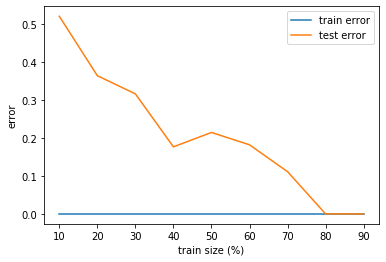

In [4]:
plt.plot(train_size, train_errors, label='train error')
plt.plot(train_size, test_errors, label='test error')
plt.xlabel('train size (%)')
plt.ylabel('error')
plt.legend()

### Hipotesis: Se puede apreciar que a medida que el tamaño del conjunto de entrenamiento crece, el score de entrenamiento no varia, esto se conoce como baja varianza. Tambien se puede ver que a medida que el tamaño del conjunto de entrenamiento crece, el error de testeo tiende a reducir y se va reduciendo la brecha entre el error de entrenamiento y el de testeo, lo cual nos indica que el clasificador logra generalizar mejor y dar mejores predicciones.